In [1]:
from google.colab import drive
drive.mount("/gdrive")
%cd "/gdrive"

Mounted at /gdrive
/gdrive


In [2]:
import os
os.chdir("/gdrive/MyDrive/work_space/12_rnn")
!ls

Basit_RNN.ipynb
Bidirectional_LSTM_on_IMDB.ipynb
YİNELEMELİ_SİNİR_AĞI_İLE_IMDB_VERİSİ_ÖRNEĞİ.ipynb


# Setup

In [3]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
MAX_FEATURES = 20000  # Only consider the top 20k words
MAXLEN= 200  # Only consider the first 200 words of each movie review

# Data Preprocessing

In [5]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=MAX_FEATURES)

print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
# Use pad_sequence to standardize sequence length:
# this will truncate sequences longer than 200 words and zero-pad sequences shorter than 200 words.
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAXLEN)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=MAXLEN)

17473536/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


# Create Model

In [6]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(MAX_FEATURES, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-train

# Train Model

In [7]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
782/782 [==============================] - 207s 250ms/step - loss: 0.4499 - accuracy: 0.7882 - val_loss: 0.4065 - val_accuracy: 0.8128
Epoch 2/2
782/782 [==============================] - 193s 247ms/step - loss: 0.3737 - accuracy: 0.8408 - val_loss: 0.5515 - val_accuracy: 0.7618


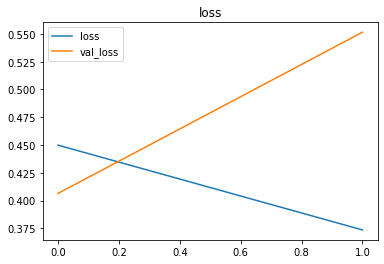

In [8]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

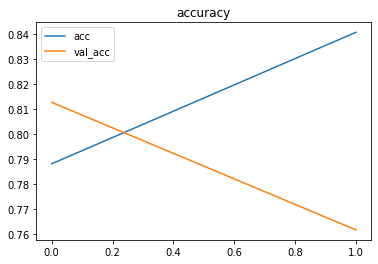

In [9]:
plt.plot(hist.history["accuracy"], label="acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")
plt.title("accuracy")
plt.legend()

# New Model

In [12]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(MAX_FEATURES, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-tra

In [11]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
 11/782 [..............................] - ETA: 1:11:45 - loss: 0.6951 - accuracy: 0.4631

KeyboardInterrupt: ignored

In [ ]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.plot(hist.history["accuracy"], label="acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")
plt.title("accuracy")
plt.legend()